# importing requires libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Given Data Set  // Data Loading

In [2]:
df=pd.read_csv('Sample - Superstore Sales (Excel).csv',encoding='latin')
#default encoder UTF-8 Doesnt work,cp1252 encoding doesnt read 
# all entries in product type column, so finalised latin as encoding technique

In [3]:
# x=df==pd.read_csv('Sample - Superstore Sales (Excel).csv',encoding='cp1252')
# x[x==False].isnull().sum()

# Understanding the data

In [4]:
#shape of our dataset
print('The Shape of our Dataset is',df.shape)

The Shape of our Dataset is (8399, 13)


In [5]:
#checking Head of our Data
# pd.options.display.max_rows=10000
df.head()

,Row ID,Order ID,Order Date,Month Year,Order Priority,Order Quantity,Sales,Customer Name,Province,Region,Product Category,Product Sub-Category,Product Name
0,1,3,10/13/2010,10-01-2010,Low,6,261.5400,Muhammed MacIntyre,Nunavut,Nunavut,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum"
1,49,293,10-01-2012,10-01-2012,High,49,10123.0200,Barry French,Nunavut,Nunavut,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera..."
2,50,293,10-01-2012,10-01-2012,High,27,244.5700,Barry French,Nunavut,Nunavut,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl"
3,80,483,07-10-2011,07-01-2011,High,30,4965.7595,Clay Rozendal,Nunavut,Nunavut,Technology,Telephones and Communication,R380
4,85,515,8/28/2010,08-01-2010,Not Specified,19,394.2700,Carlos Soltero,Nunavut,Nunavut,Office Supplies,Appliances,Holmes HEPA Air Purifier


In [6]:
#Knowing Columns of our Data
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Month Year', 'Order Priority',
       'Order Quantity', 'Sales', 'Customer Name', 'Province', 'Region',
       'Product Category', 'Product Sub-Category', 'Product Name'],
      dtype='object')

In [7]:
#getting information abpout Rows and columns of our Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                8399 non-null   int64  
 1   Order ID              8399 non-null   int64  
 2   Order Date            8399 non-null   object 
 3   Month Year            8399 non-null   object 
 4   Order Priority        8399 non-null   object 
 5   Order Quantity        8399 non-null   int64  
 6   Sales                 8399 non-null   float64
 7   Customer Name         8399 non-null   object 
 8   Province              8399 non-null   object 
 9   Region                8399 non-null   object 
 10  Product Category      8399 non-null   object 
 11  Product Sub-Category  8399 non-null   object 
 12  Product Name          8399 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 853.1+ KB


Our Data set Consist of **8399 Rows** and **13 Columns**

When we look at the Columns We can Say That There are **NO Null/MISSING Values** in any of the columns

Thing To be done are 
**1.Rename the columns    2.Change Data Type of ORDER DATE,Month year**

## Data Cleaning

In [8]:
# renaming the Columns
df.rename(columns=lambda x:x.replace(' ','_').replace('-','_'),inplace=True)
#Columns Before:  ['Row ID', 'Order ID', 'Order Date', 'Month Year', 'Order Priority','Order Quantity', 'Sales', 'Customer Name', 'Province', 'Region','Product Category', 'Product Sub-Category', 'Product Name']
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Month_Year', 'Order_Priority',
       'Order_Quantity', 'Sales', 'Customer_Name', 'Province', 'Region',
       'Product_Category', 'Product_Sub_Category', 'Product_Name'],
      dtype='object')

In [9]:
df.Order_Date=df.Order_Date.apply(lambda x:x.replace('-','/'))  
#bringing all dates  to same format '12-23-2013' to '12/23/2013'
df.Order_Date=pd.to_datetime(df.Order_Date,format='%m/%d/%Y')
df.Order_Date.head(1)

0   2010-10-13
Name: Order_Date, dtype: datetime64[ns]

In [10]:
df.Month_Year=pd.to_datetime(df.Month_Year,format='%m-%d-%Y')

In [11]:
#checking for Data Inconsistency or data abnoramality and data anamolies
for i in df.select_dtypes(exclude=np.number).columns[2:]:
    print(df[i].value_counts())
    print('-----------------------------------------------------------------------------')

High             1768
Low              1720
Not Specified    1672
Medium           1631
Critical         1608
Name: Order_Priority, dtype: int64
-----------------------------------------------------------------------------
Darren Budd          41
Ed Braxton           38
Brad Thomas          35
Carlos Soltero       33
Patrick Jones        30
                     ..
Natalie DeCherney     1
Dorothy Dickinson     1
Craig Carreira        1
Maria Etezadi         1
Sample Company A      1
Name: Customer_Name, Length: 795, dtype: int64
-----------------------------------------------------------------------------
Ontario                  1826
British Columbia         1126
Saskachewan               913
Alberta                   865
Manitoba                  793
Quebec                    781
Yukon                     542
Nova Scotia               464
Northwest Territories     394
New Brunswick             323
Prince Edward Island      211
Newfoundland               82
Nunavut                    7

In [12]:
df[df.Product_Name.str.contains('not')].size

0

no data inconsistencies found other than Not Specified category in order priority which can be changed according to business sense depending on the orderpriority significance in dataset

In [13]:
df[df.duplicated()]
#no duplicate Values found in The data

,Row_ID,Order_ID,Order_Date,Month_Year,Order_Priority,Order_Quantity,Sales,Customer_Name,Province,Region,Product_Category,Product_Sub_Category,Product_Name


## Exploratory Data Analysis

In [14]:
#Exploring unique values of each artribute
print('number of Transactions',df.Order_ID.nunique())
print('number of Customers',df.Customer_Name.str.upper().nunique())
for i in df.columns[-5:]:
    print('number of',i+'s',df[i].nunique())

number of Transactions 5496
number of Customers 795
number of Provinces 13
number of Regions 8
number of Product_Categorys 3
number of Product_Sub_Categorys 17
number of Product_Names 1263


In [15]:
df.describe()

,Row_ID,Order_ID,Order_Quantity,Sales
count,8399.000000,8399.000000,8399.000000,8399.000000
mean,4200.000000,29965.179783,25.571735,1775.878179
std,2424.726789,17260.883447,14.481071,3585.050525
min,1.000000,3.000000,1.000000,2.240000
25%,2100.500000,15011.500000,13.000000,143.195000
50%,4200.000000,29857.000000,26.000000,449.420000
75%,6299.500000,44596.000000,38.000000,1709.320000
max,8399.000000,59973.000000,50.000000,89061.050000


there are no negative values in order quantities,Sales which tells no returns/cancellation happened and our data is good to Go

In [16]:
df

,Row_ID,Order_ID,Order_Date,Month_Year,Order_Priority,Order_Quantity,Sales,Customer_Name,Province,Region,Product_Category,Product_Sub_Category,Product_Name
0,1,3,2010-10-13,2010-10-01,Low,6,261.5400,Muhammed MacIntyre,Nunavut,Nunavut,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum"
1,49,293,2012-10-01,2012-10-01,High,49,10123.0200,Barry French,Nunavut,Nunavut,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera..."
2,50,293,2012-10-01,2012-10-01,High,27,244.5700,Barry French,Nunavut,Nunavut,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl"
3,80,483,2011-07-10,2011-07-01,High,30,4965.7595,Clay Rozendal,Nunavut,Nunavut,Technology,Telephones and Communication,R380
4,85,515,2010-08-28,2010-08-01,Not Specified,19,394.2700,Carlos Soltero,Nunavut,Nunavut,Office Supplies,Appliances,Holmes HEPA Air Purifier
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,7765,55558,2010-08-09,2010-08-01,Medium,8,1294.0400,Mick Brown,Alberta,West,Furniture,Bookcases,Bush Mission Pointe Library
8395,7766,55558,2010-08-09,2010-08-01,Medium,23,392.5700,Mick Brown,Alberta,West,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...
8396,7906,56550,2011-04-08,2011-04-01,Not Specified,37,823.7800,Frank Hawley,Alberta,West,Furniture,Office Furnishings,"Executive Impressions 14"""
8397,7907,56550,2011-04-08,2011-04-01,Not Specified,8,469.8375,Frank Hawley,Alberta,West,Technology,Telephones and Communication,Talkabout T8367


Dropping Unnecessary Columns

In [17]:
df.drop(columns=['Row_ID','Month_Year'],inplace=True)#
#why removed

## Data Visualization and KPI Reporting

In [18]:
df

,Order_ID,Order_Date,Order_Priority,Order_Quantity,Sales,Customer_Name,Province,Region,Product_Category,Product_Sub_Category,Product_Name
0,3,2010-10-13,Low,6,261.5400,Muhammed MacIntyre,Nunavut,Nunavut,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum"
1,293,2012-10-01,High,49,10123.0200,Barry French,Nunavut,Nunavut,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera..."
2,293,2012-10-01,High,27,244.5700,Barry French,Nunavut,Nunavut,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl"
3,483,2011-07-10,High,30,4965.7595,Clay Rozendal,Nunavut,Nunavut,Technology,Telephones and Communication,R380
4,515,2010-08-28,Not Specified,19,394.2700,Carlos Soltero,Nunavut,Nunavut,Office Supplies,Appliances,Holmes HEPA Air Purifier
...,...,...,...,...,...,...,...,...,...,...,...
8394,55558,2010-08-09,Medium,8,1294.0400,Mick Brown,Alberta,West,Furniture,Bookcases,Bush Mission Pointe Library
8395,55558,2010-08-09,Medium,23,392.5700,Mick Brown,Alberta,West,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...
8396,56550,2011-04-08,Not Specified,37,823.7800,Frank Hawley,Alberta,West,Furniture,Office Furnishings,"Executive Impressions 14"""
8397,56550,2011-04-08,Not Specified,8,469.8375,Frank Hawley,Alberta,West,Technology,Telephones and Communication,Talkabout T8367


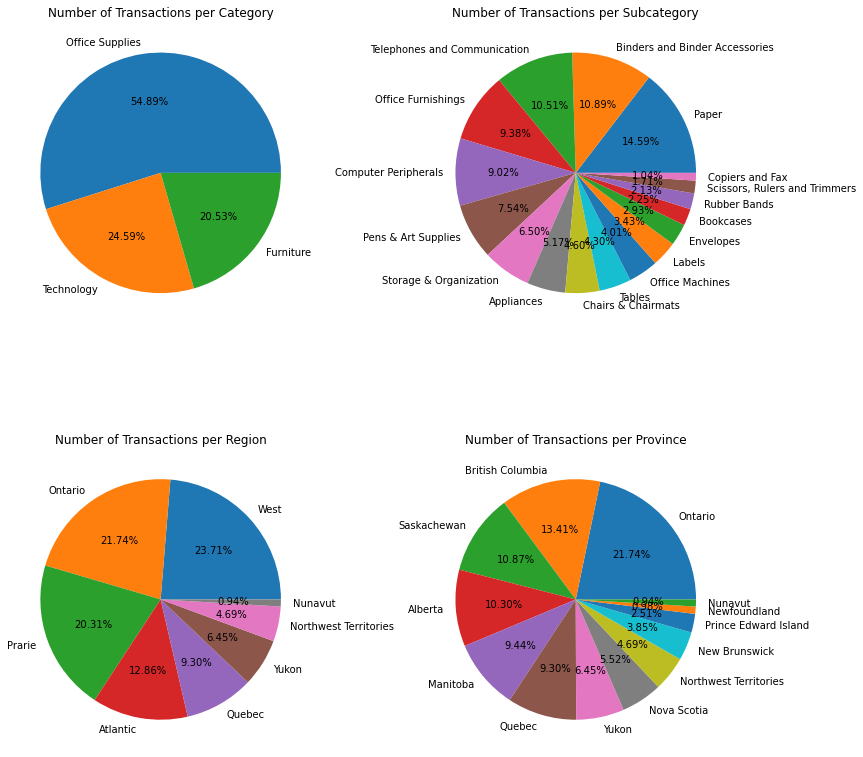

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax[0, 0].pie(df['Product_Category'].value_counts().values, labels=df['Product_Category'].value_counts().index, autopct='%.2f%%')
ax[0, 0].set_title('Number of Transactions per Category')
ax[0, 1].pie(df['Product_Sub_Category'].value_counts().values, labels=df['Product_Sub_Category'].value_counts().index, autopct='%.2f%%')
ax[0, 1].set_title('Number of Transactions per Subcategory')
ax[1, 0].pie(df['Region'].value_counts().values, labels=df['Region'].value_counts().index, autopct='%.2f%%')
ax[1, 0].set_title('Number of Transactions per Region')
ax[1, 1].pie(df['Province'].value_counts().values, labels=df['Province'].value_counts().index, autopct='%.2f%%')
ax[1, 1].set_title('Number of Transactions per Province')
plt.tight_layout()
plt.show()

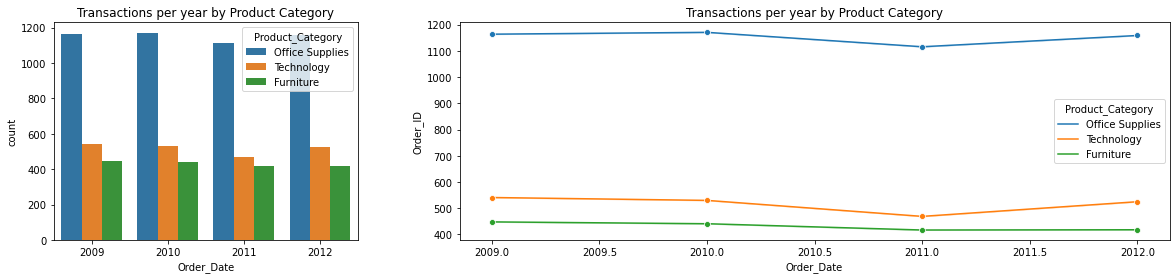

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [0.6, 1.4]})
sns.countplot(df.Order_Date.dt.year,hue=df['Product_Category'],ax=ax[0])
ax[0].set_title('Transactions per year by Product Category')
sns.lineplot(x=df.Order_Date.dt.year,y=df.Order_ID,hue=df.Product_Category,estimator=np.size,marker='o',ax=ax[1])
ax[1].set_title('Transactions per year by Product Category')
plt.show()

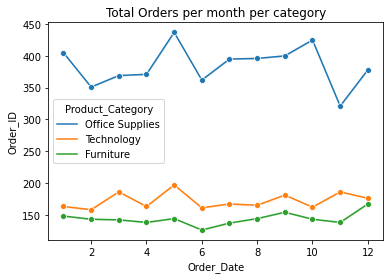

In [21]:
sns.lineplot(x=df.Order_Date.dt.month,y=df.Order_ID,hue=df.Product_Category,estimator=np.size,marker='o')
plt.title('Total Orders per month per category')
plt.show()

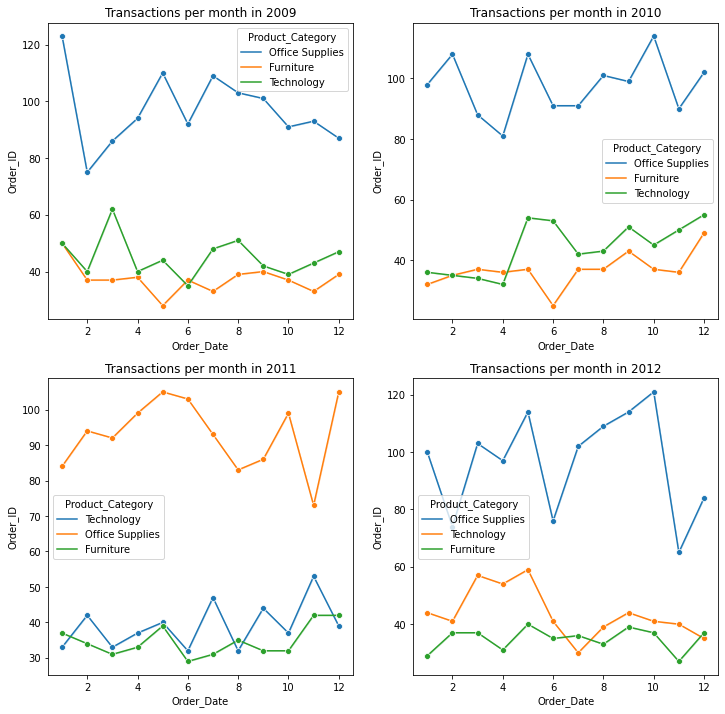

In [22]:
fig,ax=plt.subplots(2,2,figsize=(12,12))
for i,j in zip([2009,2010,2011,2012],ax.flatten()):
    df1=df[df.Order_Date.dt.year==i]
    sns.lineplot(x=df1.Order_Date.dt.month,y=df1.Order_ID,hue=df1.Product_Category,estimator=np.size,marker='o',ax=j)
ax[0,0].set_title('Transactions per month in 2009')
ax[0,1].set_title('Transactions per month in 2010')
ax[1,0].set_title('Transactions per month in 2011')
ax[1,1].set_title('Transactions per month in 2012')
plt.show()

In [23]:
crostab_Total_Sales=pd.crosstab([df.Region,df.Province],df.Product_Category,values=df.Sales,aggfunc=np.sum)

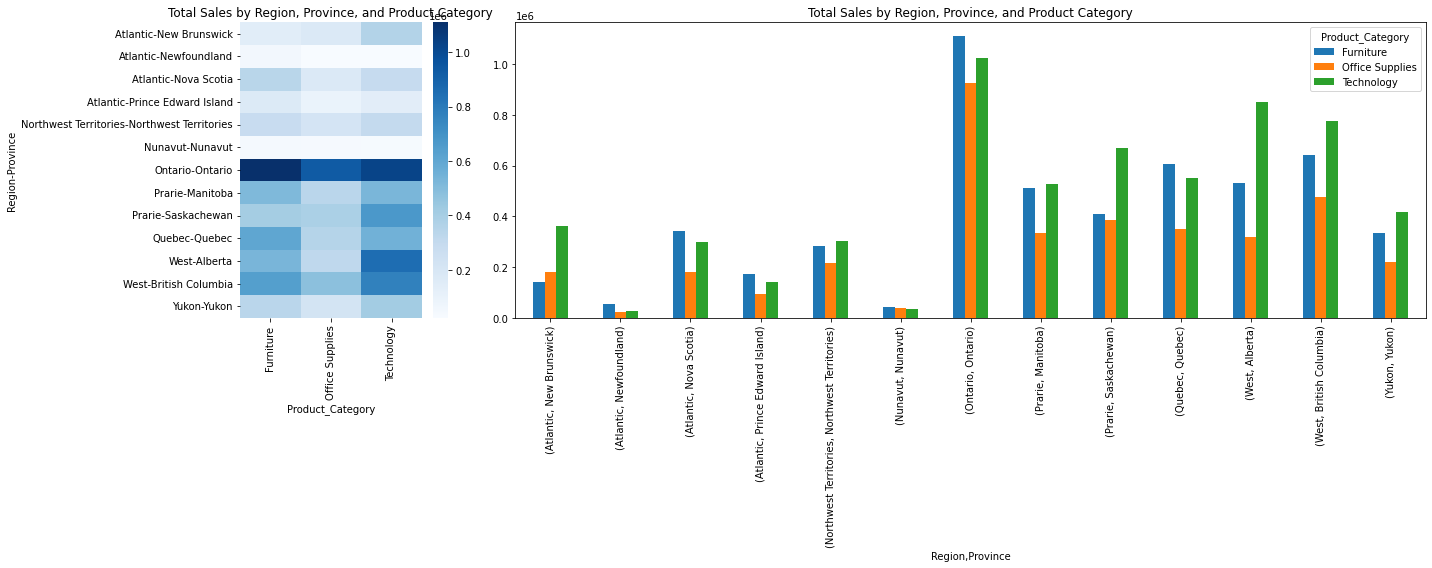

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'width_ratios': [0.4, 1.6]})
sns.heatmap(data=crostab_Total_Sales, cmap='Blues', ax=ax[0])
plt.xticks(rotation=90)
ax[0].set_title('Total Sales by Region, Province, and Product Category')
crostab_Total_Sales.plot(kind='bar',ax=ax[1])
ax[1].set_title('Total Sales by Region, Province, and Product Category')
plt.tight_layout()
plt.show()

In [25]:
crostab_Avg_Sales=pd.crosstab([df.Region,df.Province],df.Product_Category,values=df.Sales,aggfunc=np.mean)

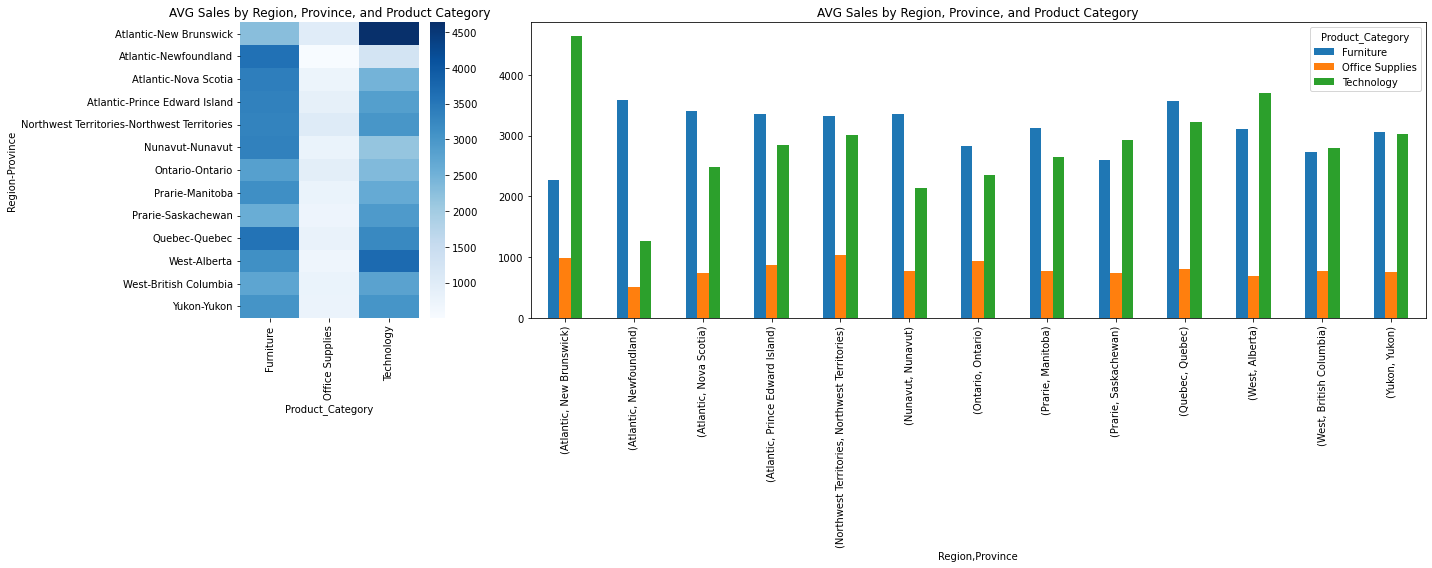

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'width_ratios': [0.4, 1.6]})
sns.heatmap(data=crostab_Avg_Sales, cmap='Blues', ax=ax[0])
plt.xticks(rotation=90)
ax[0].set_title('AVG Sales by Region, Province, and Product Category')
crostab_Avg_Sales.plot(kind='bar',ax=ax[1])
ax[1].set_title('AVG Sales by Region, Province, and Product Category')
plt.tight_layout()
plt.show()

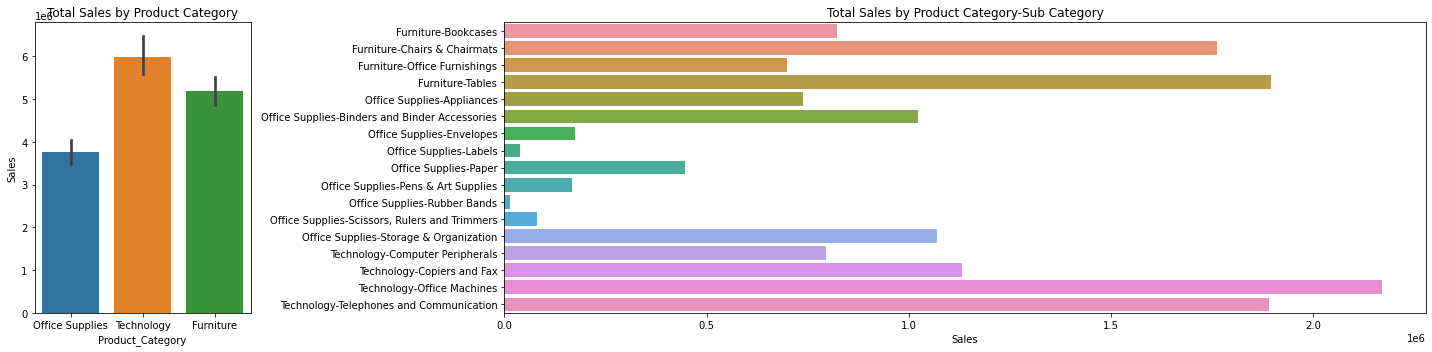

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw={'width_ratios': [0.38, 1.62]})
sns.barplot(df.Product_Category,df.Sales,estimator=np.sum,ax=ax[0])
pts = df.groupby(['Product_Category', 'Product_Sub_Category'], as_index=False).Sales.sum()
sns.barplot(pts.Sales,pts['Product_Category']+'-'+pts['Product_Sub_Category'],ax=ax[1])
ax[0].set_title('Total Sales by Product Category')
ax[1].set_title('Total Sales by Product Category-Sub Category')
plt.tight_layout()
plt.show()

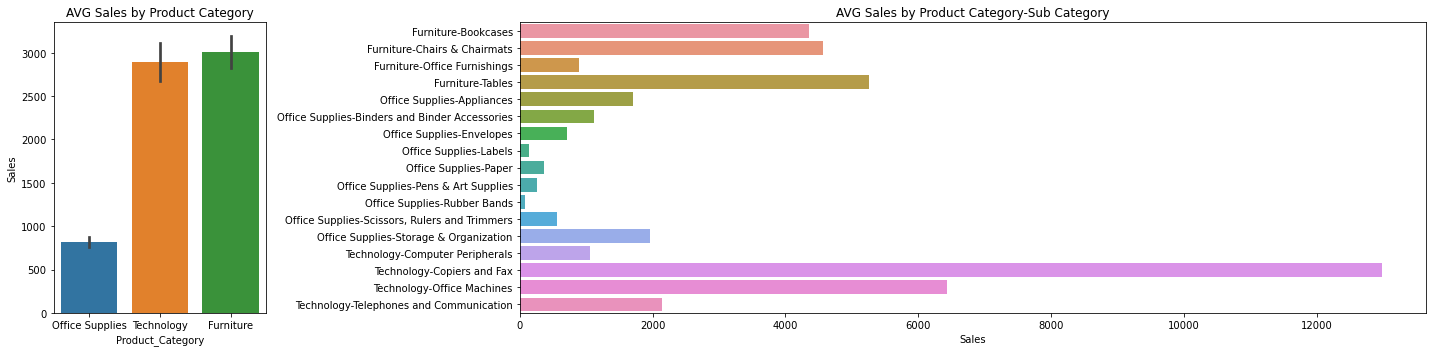

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw={'width_ratios': [0.38, 1.62]})
sns.barplot(df.Product_Category,df.Sales,estimator=np.mean,ax=ax[0])
pts = df.groupby(['Product_Category', 'Product_Sub_Category'], as_index=False).Sales.mean()
sns.barplot(pts.Sales,pts['Product_Category']+'-'+pts['Product_Sub_Category'])
ax[0].set_title('AVG Sales by Product Category')
ax[1].set_title('AVG Sales by Product Category-Sub Category')
plt.tight_layout()
plt.show()

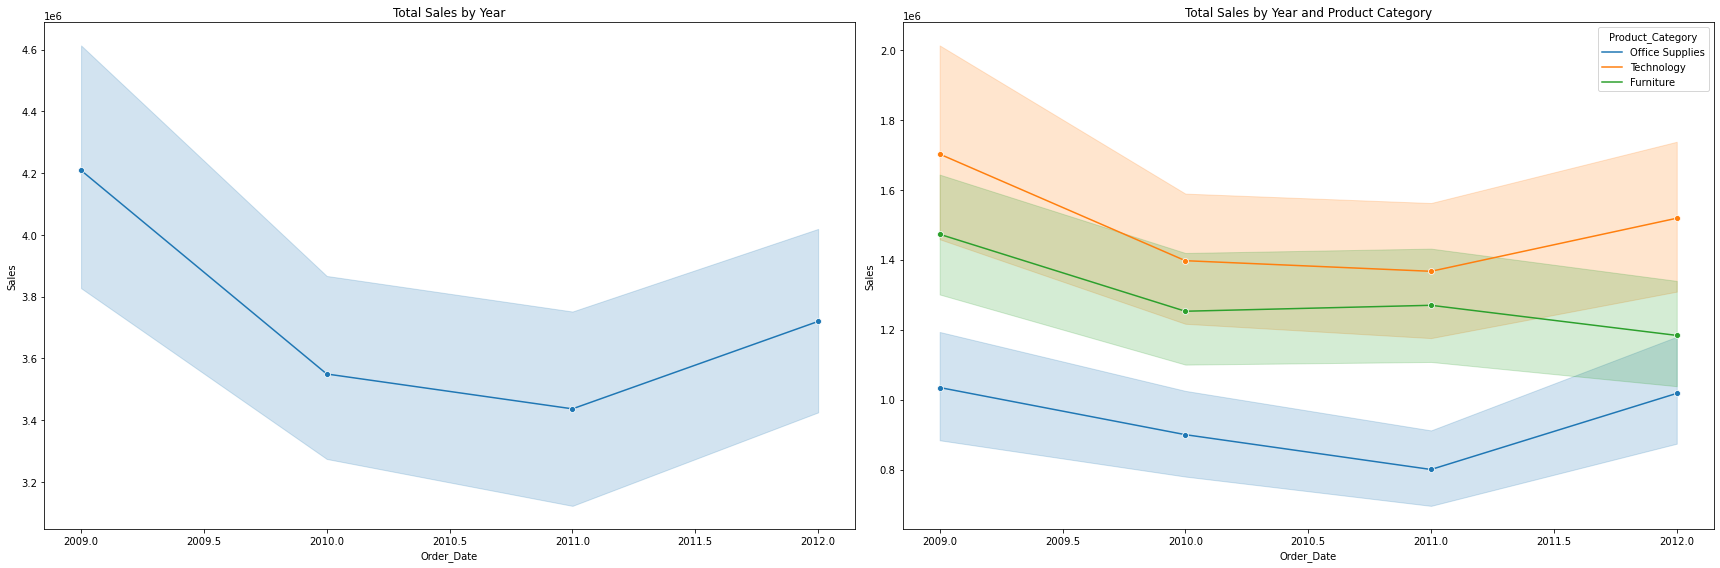

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8))
sns.lineplot(ax=axes[0], x=df.Order_Date.dt.year, y=df.Sales, estimator=np.sum, marker='o')
axes[0].set_title('Total Sales by Year')
sns.lineplot(ax=axes[1], x=df.Order_Date.dt.year, y=df.Sales, hue=df.Product_Category, estimator=np.sum, marker='o')
axes[1].set_title('Total Sales by Year and Product Category')
plt.tight_layout()
plt.show()

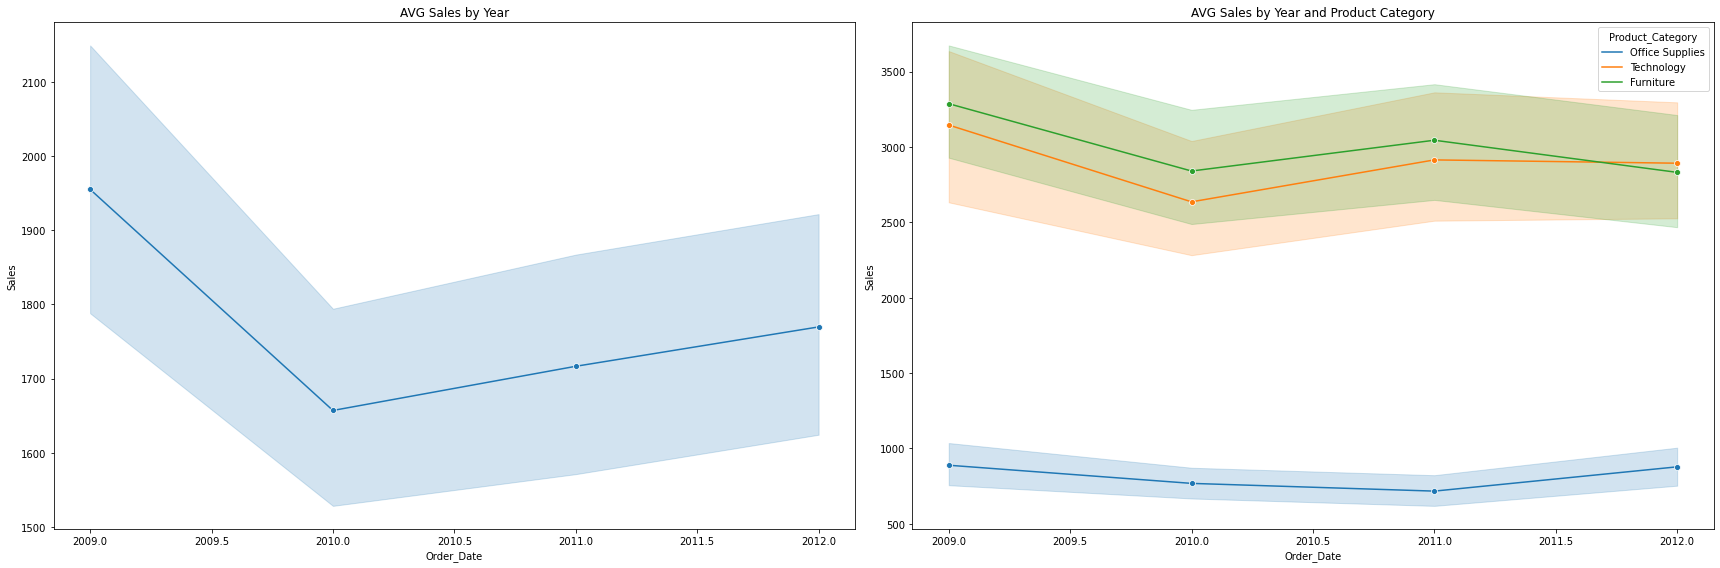

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8))
sns.lineplot(ax=axes[0], x=df.Order_Date.dt.year, y=df.Sales, estimator=np.mean, marker='o')
axes[0].set_title('AVG Sales by Year')
sns.lineplot(ax=axes[1], x=df.Order_Date.dt.year, y=df.Sales, hue=df.Product_Category, estimator=np.mean, marker='o')
axes[1].set_title('AVG Sales by Year and Product Category')
plt.tight_layout()
plt.show()

In [31]:
crostab_Total_quantities=pd.crosstab([df.Region,df.Province],df.Product_Category,values=df.Order_Quantity,aggfunc=np.sum)
crostab_Total_quantities

Product_Category                             Furniture  Office Supplies  \
Region                Province                                            
Atlantic              New Brunswick               1753             4625   
                      Newfoundland                 346             1164   
                      Nova Scotia                 2639             6237   
                      Prince Edward Island        1444             2988   
Northwest Territories Northwest Territories       2066             5164   
Nunavut               Nunavut                      368             1220   
Ontario               Ontario                     9702            25582   
Prarie                Manitoba                    4262            11244   
                      Saskachewan                 4102            13467   
Quebec                Quebec                      4436            10850   
West                  Alberta                     4563            12305   
                      British Columbia            5998            15868   
Yukon                 Yukon                       2645             7564   

Product_Category                             Technology  
Region                Province                           
Atlantic              New Brunswick                2059  
                      Newfoundland                  426  
                      Nova Scotia                  2998  
                      Prince Edward Island         1389  
Northwest Territories Northwest Territories        2492  
Nunavut               Nunavut                       374  
Ontario               Ontario                     11401  
Prarie                Manitoba                     4773  
                      Saskachewan                  5884  
Quebec                Quebec                       4303  
West                  Alberta                      5786  
                      British Columbia             6903  
Yukon                 Yukon                        3387

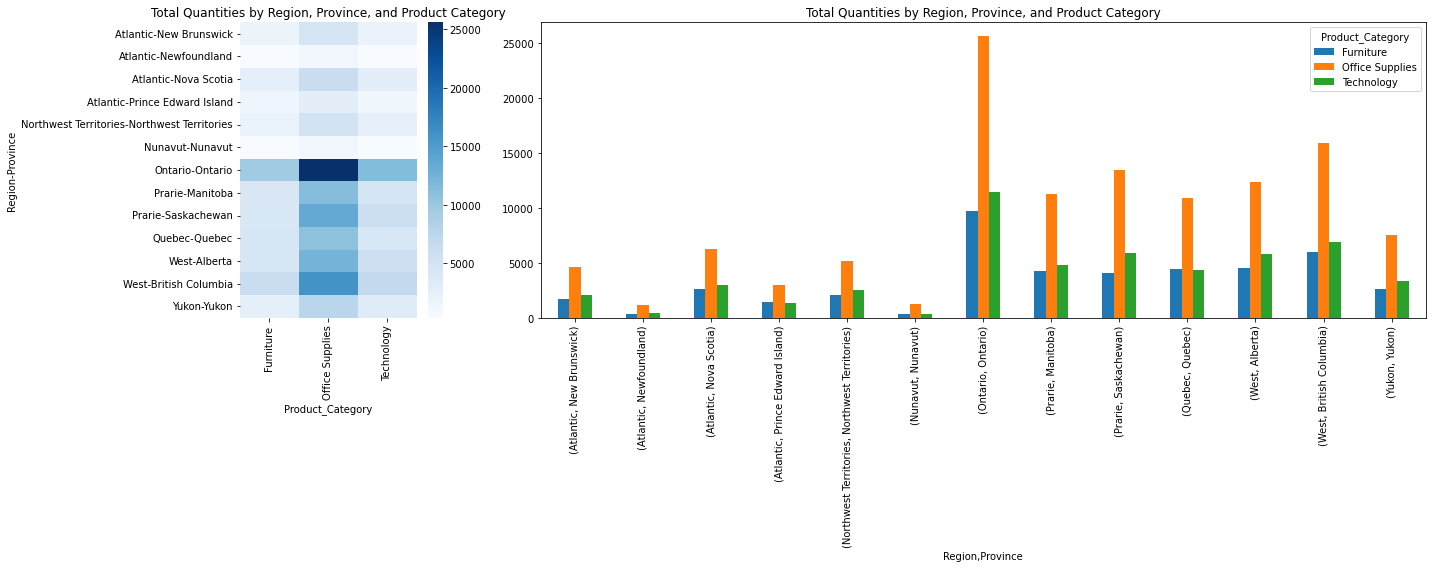

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'width_ratios': [0.4, 1.6]})
sns.heatmap(data=crostab_Total_quantities, cmap='Blues', ax=ax[0])
plt.xticks(rotation=90)
ax[0].set_title('Total Quantities by Region, Province, and Product Category')
crostab_Total_quantities.plot(kind='bar',ax=ax[1])
ax[1].set_title('Total Quantities by Region, Province, and Product Category')
plt.tight_layout()
plt.show()

In [33]:
crostab_AVG_quantities=pd.crosstab([df.Region,df.Province],df.Product_Category,values=df.Order_Quantity,aggfunc=np.mean)

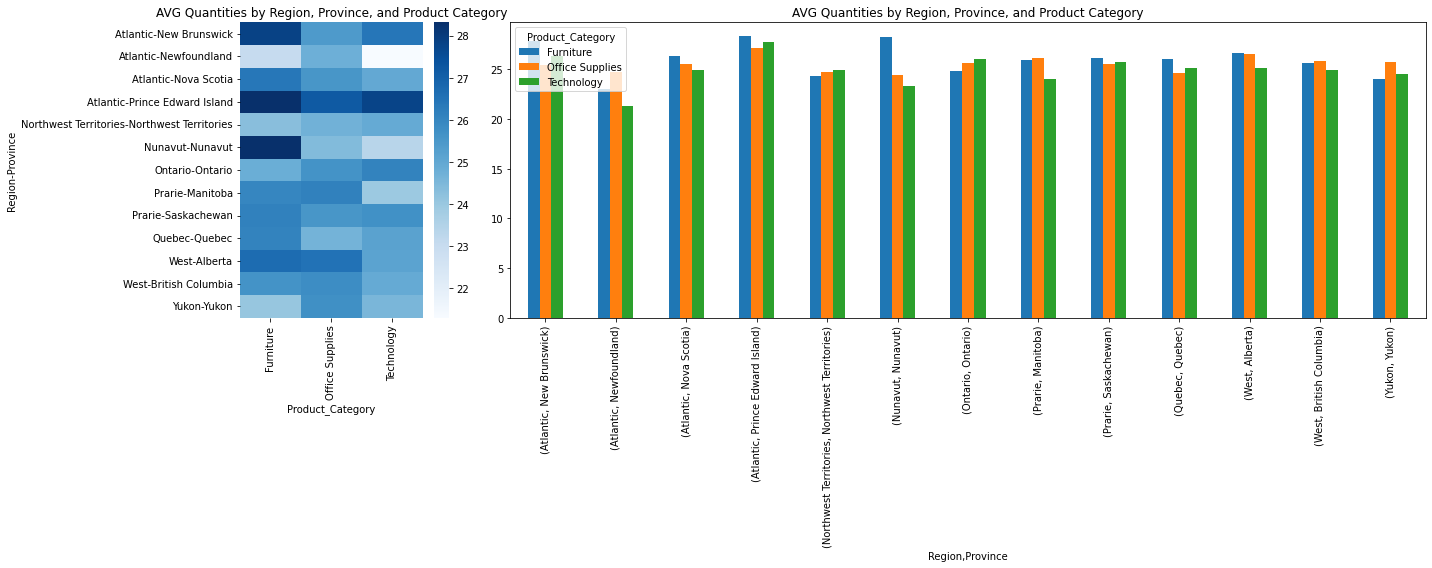

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'width_ratios': [0.4, 1.6]})
sns.heatmap(data=crostab_AVG_quantities, cmap='Blues', ax=ax[0])
plt.xticks(rotation=90)
ax[0].set_title('AVG Quantities by Region, Province, and Product Category')
crostab_AVG_quantities.plot(kind='bar',ax=ax[1])
ax[1].set_title('AVG Quantities by Region, Province, and Product Category')
plt.tight_layout()
plt.show()

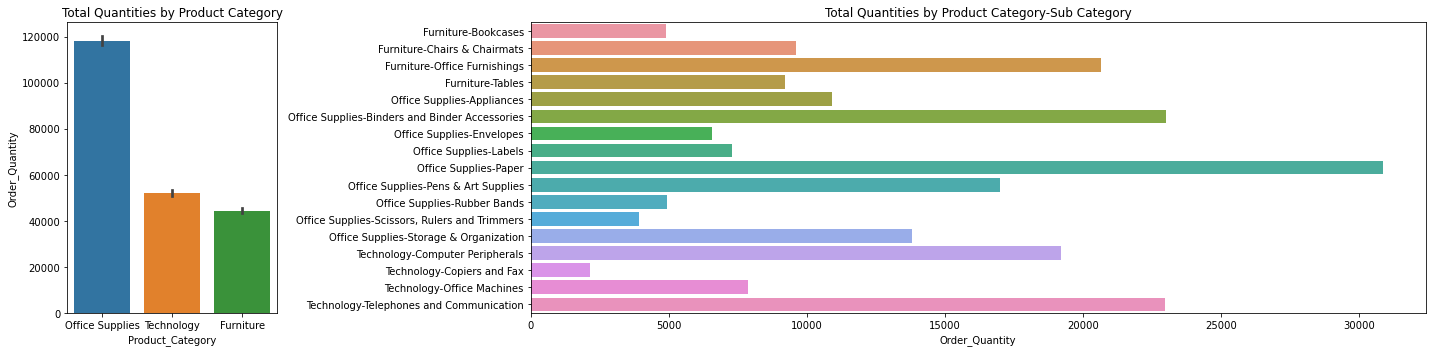

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw={'width_ratios': [0.38, 1.62]})
sns.barplot(df.Product_Category,df.Order_Quantity,estimator=np.sum,ax=ax[0])
pts = df.groupby(['Product_Category', 'Product_Sub_Category'], as_index=False).Order_Quantity.sum()
sns.barplot(pts.Order_Quantity,pts['Product_Category']+'-'+pts['Product_Sub_Category'],ax=ax[1])
ax[0].set_title('Total Quantities by Product Category')
ax[1].set_title('Total Quantities by Product Category-Sub Category')
plt.tight_layout()
plt.show()

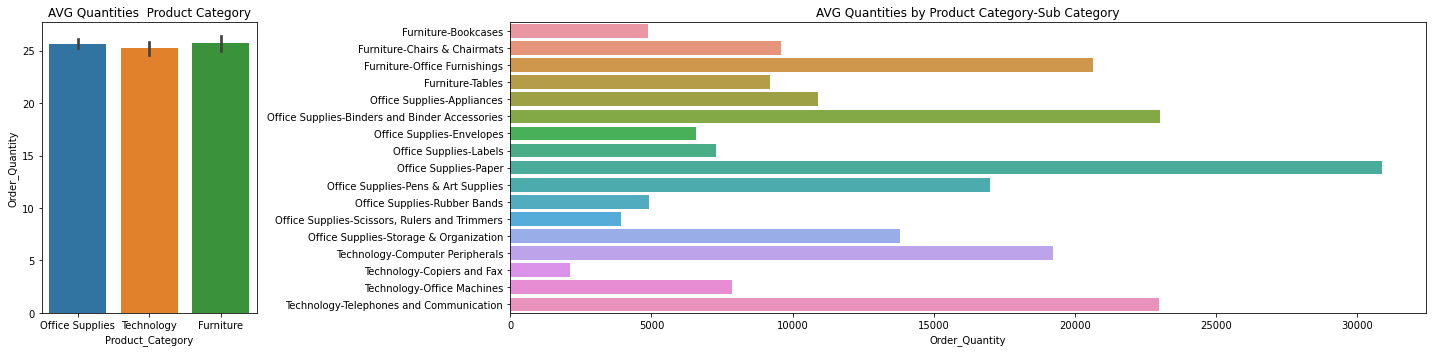

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw={'width_ratios': [0.38, 1.62]})
sns.barplot(df.Product_Category,df.Order_Quantity,estimator=np.mean,ax=ax[0])
pts = df.groupby(['Product_Category', 'Product_Sub_Category'], as_index=False).Order_Quantity.sum()
sns.barplot(pts.Order_Quantity,pts['Product_Category']+'-'+pts['Product_Sub_Category'],ax=ax[1])
ax[0].set_title('AVG Quantities  Product Category')
ax[1].set_title('AVG Quantities by Product Category-Sub Category')
plt.tight_layout()
plt.show()

In [37]:
demand_df=pd.crosstab([df.Order_Date.dt.month,df.Region],df.Product_Sub_Category,values=df.Order_Quantity,aggfunc=np.mean).fillna(0)
demand_df

Product_Sub_Category              Appliances  Binders and Binder Accessories  \
Order_Date Region                                                              
1          Atlantic                23.142857                       22.272727   
           Northwest Territories   40.000000                       46.000000   
           Nunavut                  0.000000                        0.000000   
           Ontario                 18.666667                       25.285714   
           Prarie                  22.384615                       29.133333   
...                                      ...                             ...   
12         Ontario                 18.000000                       25.333333   
           Prarie                  29.200000                       24.733333   
           Quebec                  31.000000                       21.250000   
           West                    30.400000                       25.214286   
           Yukon                   20.400000                       27.500000   

Product_Sub_Category              Bookcases  Chairs & Chairmats  \
Order_Date Region                                                 
1          Atlantic               25.250000           34.750000   
           Northwest Territories  29.000000            0.000000   
           Nunavut                 0.000000            0.000000   
           Ontario                23.333333           19.142857   
           Prarie                 14.500000           24.000000   
...                                     ...                 ...   
12         Ontario                 0.000000           23.461538   
           Prarie                 25.666667           31.000000   
           Quebec                 19.800000           15.000000   
           West                   18.000000           21.875000   
           Yukon                   0.000000           34.500000   

Product_Sub_Category              Computer Peripherals  Copiers and Fax  \
Order_Date Region                                                         
1          Atlantic                          26.000000             18.0   
           Northwest Territories             23.000000              0.0   
           Nunavut                           26.000000              0.0   
           Ontario                           32.000000              5.0   
           Prarie                            22.250000              0.0   
...                                                ...              ...   
12         Ontario                           21.000000             18.0   
           Prarie                            23.533333              0.0   
           Quebec                            33.200000             32.0   
           West                              25.153846              0.0   
           Yukon                             20.000000              0.0   

Product_Sub_Category              Envelopes     Labels  Office Furnishings  \
Order_Date Region                                                            
1          Atlantic               35.333333  12.000000           24.125000   
           Northwest Territories   0.000000  37.000000           42.000000   
           Nunavut                 0.000000   0.000000            0.000000   
           Ontario                17.250000  14.800000           27.235294   
           Prarie                 20.625000  35.200000           25.133333   
...                                     ...        ...                 ...   
12         Ontario                22.200000  23.333333           26.000000   
           Prarie                 24.800000  19.833333           26.428571   
           Quebec                 20.000000  20.666667           28.125000   
           West                   38.500000  35.500000           20.941176   
           Yukon                  13.000000  39.000000           12.833333   

Product_Sub_Category              Office Machines      Paper  \
Order_Date Region               

In [38]:
#demand per Month
def demand_per_month(m):
    ddf=demand_df[demand_df.index.get_level_values(0)==m]
    return ddf
# m=int(input('Enter Month (1 to 12) : '))
# plt.figure(figsize=(20,5))
# demand_per_month(m)

Customer Metrics

In [39]:
Tsq=df.groupby('Customer_Name',as_index=0)['Sales','Order_Quantity'].sum().rename(columns={'Sales':'Total_Sales','Order_Quantity':'Total_Quantity'})
asq=df.groupby('Customer_Name',as_index=0)['Sales','Order_Quantity'].mean().rename(columns={'Sales':'Avg_Sales','Order_Quantity':'Avg_Quantity'})
tt=df.groupby('Customer_Name',as_index=0).Order_ID.size().rename(columns={'size':'Transactions'})
cm = Tsq.merge(asq, on='Customer_Name').merge(tt, on='Customer_Name')
cm.sort_values(by=['Avg_Sales'],ascending=False)

,Customer_Name,Total_Sales,Total_Quantity,Avg_Sales,Avg_Quantity,Transactions
178,Craig Carreira,41343.210,8,41343.2100,8.000000,1
261,Emily Phan,117124.438,269,11712.4438,26.900000,10
636,Rick Reed,32088.420,109,10696.1400,36.333333,3
655,Ross DeVincentis,25583.820,113,8527.9400,37.666667,3
170,Clay Cheatham,42255.168,100,8451.0336,20.000000,5
...,...,...,...,...,...,...
559,Natalie DeCherney,125.900,21,125.9000,21.000000,1
430,Katrina Edelman,180.760,37,90.3800,18.500000,2
264,Eric Murdock,343.328,82,85.8320,20.500000,4
574,Nicole Fjeld,153.030,44,76.5150,22.000000,2


In [40]:
# y=x.groupby(['Order_ID','Customer_Name'],as_index=0)['Order_ID'].size()
# y['asd']=y.Order_ID.apply(lambda x: len(y[y.Order_ID==x]) if len(y[y.Order_ID==x])>1 else 1)
# y[y.asd>1]

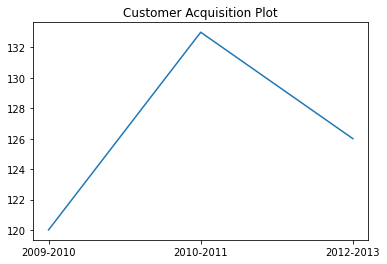

In [41]:
cad={}
for i in sorted(df.Order_Date.dt.year.unique()):
    li=df[df.Order_Date.dt.year==i].Customer_Name.unique()
    cad[i]=set(li)
cgl=[]
years = sorted(cad.keys())
for i in range(len(years) - 1):
    cgl.append(len(cad[years[i]].difference(cad[years[i+1]])))
cgl
sns.lineplot(x=['2009-2010','2010-2011','2012-2013'],y=cgl)
plt.title('Customer Acquisition Plot')
plt.show()

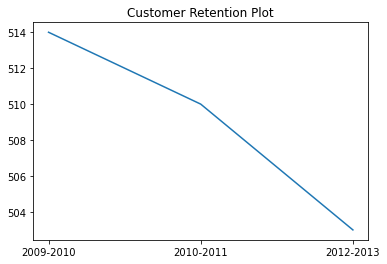

In [42]:
cad={}
for i in sorted(df.Order_Date.dt.year.unique()):
    li=df[df.Order_Date.dt.year==i].Customer_Name.unique()
    cad[i]=set(li)
cgl=[]
years = sorted(cad.keys())
for i in range(len(years) - 1):
    cgl.append(len(cad[years[i]].intersection(cad[years[i+1]])))
cgl
sns.lineplot(x=['2009-2010','2010-2011','2012-2013'],y=cgl)
plt.title('Customer Retention Plot')
plt.show()

## RFM Analysis

In [43]:
df

,Order_ID,Order_Date,Order_Priority,Order_Quantity,Sales,Customer_Name,Province,Region,Product_Category,Product_Sub_Category,Product_Name
0,3,2010-10-13,Low,6,261.5400,Muhammed MacIntyre,Nunavut,Nunavut,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum"
1,293,2012-10-01,High,49,10123.0200,Barry French,Nunavut,Nunavut,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera..."
2,293,2012-10-01,High,27,244.5700,Barry French,Nunavut,Nunavut,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl"
3,483,2011-07-10,High,30,4965.7595,Clay Rozendal,Nunavut,Nunavut,Technology,Telephones and Communication,R380
4,515,2010-08-28,Not Specified,19,394.2700,Carlos Soltero,Nunavut,Nunavut,Office Supplies,Appliances,Holmes HEPA Air Purifier
...,...,...,...,...,...,...,...,...,...,...,...
8394,55558,2010-08-09,Medium,8,1294.0400,Mick Brown,Alberta,West,Furniture,Bookcases,Bush Mission Pointe Library
8395,55558,2010-08-09,Medium,23,392.5700,Mick Brown,Alberta,West,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...
8396,56550,2011-04-08,Not Specified,37,823.7800,Frank Hawley,Alberta,West,Furniture,Office Furnishings,"Executive Impressions 14"""
8397,56550,2011-04-08,Not Specified,8,469.8375,Frank Hawley,Alberta,West,Technology,Telephones and Communication,Talkabout T8367


In [44]:
fdf=df.groupby('Customer_Name',as_index=False).Order_ID.size().rename(columns={'size':'Frequency'})
mdf=df.groupby('Customer_Name',as_index=False).Sales.sum().rename(columns={'Sales':'Monetary_value'})

In [45]:
#considering max date on the data set as latest date
now=df.Order_Date.max()
rdf=df.groupby('Customer_Name',as_index=False).Order_Date.max().rename(columns={'Order_Date':'Last_purchased_date'})
rdf['Recency']=rdf['Last_purchased_date'].apply(lambda x:(now-x).days)
rdf

,Customer_Name,Last_purchased_date,Recency
0,Aaron Bergman,2011-05-28,582
1,Aaron Hawkins,2011-12-29,367
2,Aaron Smayling,2012-01-19,346
3,Adam Bellavance,2012-10-02,89
4,Adam Hart,2012-12-11,19
...,...,...,...
790,Vivian Mathis,2012-11-06,54
791,William Brown,2012-12-20,10
792,Xylona Price,2012-12-06,24
793,Yana Sorensen,2012-08-20,132


In [46]:
rfm=rdf.merge(fdf,on='Customer_Name').merge(mdf,on='Customer_Name')
rfm.drop('Last_purchased_date',axis=1,inplace=True)
rfm

,Customer_Name,Recency,Frequency,Monetary_value
0,Aaron Bergman,582,7,11630.5900
1,Aaron Hawkins,367,12,27690.7255
2,Aaron Smayling,346,14,8835.3235
3,Adam Bellavance,89,12,11577.5800
4,Adam Hart,19,27,26114.2645
...,...,...,...,...
790,Vivian Mathis,54,15,29420.8900
791,William Brown,10,23,38872.5900
792,Xylona Price,24,14,18037.0855
793,Yana Sorensen,132,6,1987.1600


In [47]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary_value
0.25,68.0,6.0,7364.2025
0.50,155.0,9.0,15287.6730
0.75,309.5,13.0,25401.0085


In [48]:
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
def FMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [49]:
rfm_segmentation=rfm
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScoring, args=('Frequency',quantiles))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary_value'].apply(FMScoring, args=('Monetary_value',quantiles))

In [50]:
rfm_segmentation

,Customer_Name,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile
0,Aaron Bergman,582,7,11630.5900,1,2,2
1,Aaron Hawkins,367,12,27690.7255,1,3,4
2,Aaron Smayling,346,14,8835.3235,1,4,2
3,Adam Bellavance,89,12,11577.5800,3,3,2
4,Adam Hart,19,27,26114.2645,4,4,4
...,...,...,...,...,...,...,...
790,Vivian Mathis,54,15,29420.8900,4,4,4
791,William Brown,10,23,38872.5900,4,4,4
792,Xylona Price,24,14,18037.0855,4,4,3
793,Yana Sorensen,132,6,1987.1600,3,1,1


In [51]:
rfm_segmentation['RFMScore']=rfm_segmentation.R_Quartile.astype(str)+rfm_segmentation.F_Quartile.astype(str)+rfm_segmentation.M_Quartile.astype(str)                                                                                                                 
rfm_segmentation

,Customer_Name,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,Aaron Bergman,582,7,11630.5900,1,2,2,122
1,Aaron Hawkins,367,12,27690.7255,1,3,4,134
2,Aaron Smayling,346,14,8835.3235,1,4,2,142
3,Adam Bellavance,89,12,11577.5800,3,3,2,332
4,Adam Hart,19,27,26114.2645,4,4,4,444
...,...,...,...,...,...,...,...,...
790,Vivian Mathis,54,15,29420.8900,4,4,4,444
791,William Brown,10,23,38872.5900,4,4,4,444
792,Xylona Price,24,14,18037.0855,4,4,3,443
793,Yana Sorensen,132,6,1987.1600,3,1,1,311


In [52]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[(rfm_segmentation['F_Quartile']==4)&(rfm_segmentation.R_Quartile>3)]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  60
Loyal Customers:  85
Big Spenders:  199
Almost Lost:  21
Lost Customers:  8
Lost Cheap Customers:  64


## Clustering on RFM Variables

In [53]:
rfm=rfm[['Customer_Name', 'Recency', 'Frequency', 'Monetary_value']]
rfm

,Customer_Name,Recency,Frequency,Monetary_value
0,Aaron Bergman,582,7,11630.5900
1,Aaron Hawkins,367,12,27690.7255
2,Aaron Smayling,346,14,8835.3235
3,Adam Bellavance,89,12,11577.5800
4,Adam Hart,19,27,26114.2645
...,...,...,...,...
790,Vivian Mathis,54,15,29420.8900
791,William Brown,10,23,38872.5900
792,Xylona Price,24,14,18037.0855
793,Yana Sorensen,132,6,1987.1600


<AxesSubplot:>

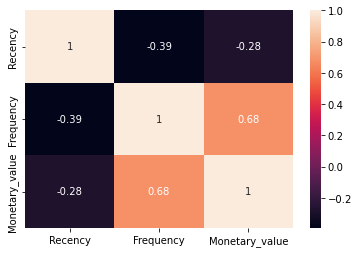

In [54]:
sns.heatmap(rfm.corr(),annot=True)
#checkin correlation strength of each variables

On one hand, we have a negative correlation between:
- Recency and Frequency
- Recency and Monetary

On the other hand, the correlation between **Monetary and Frequency** is positive comparing to negative ones and strongly Correlated. 

Recency           1.779086
Frequency         1.145411
Monetary_value    1.799469
dtype: float64

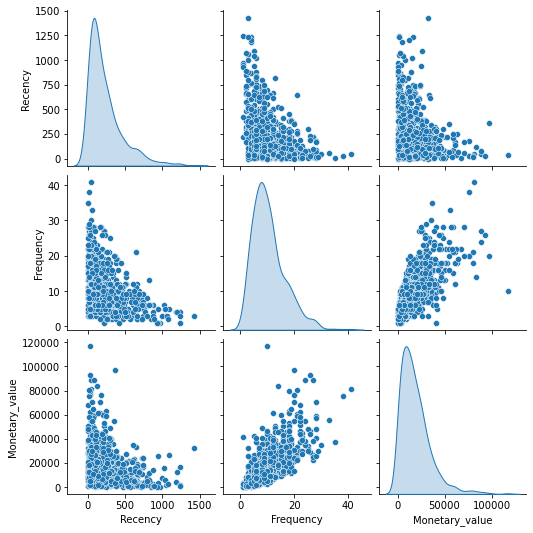

In [55]:
sns.pairplot(rfm,diag_kind='kde')
rfm.skew()

Skewness and Kurtosis of Recency is :  1.7790857681380892 3.6321826213851343


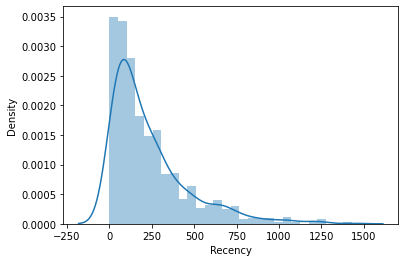

Skewness and Kurtosis of Frequency is :  1.1454106273681022 1.7168064505485252


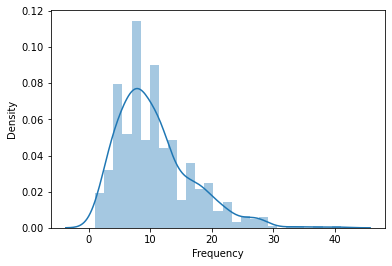

Skewness and Kurtosis of Monetary_value is :  1.7994688939979389 4.9218125130747055


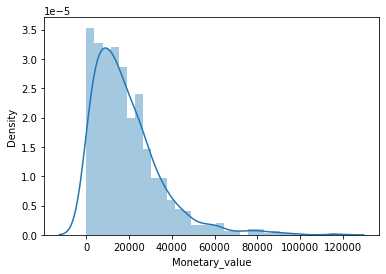

In [56]:
for i in rfm.columns[1:]:
    sns.distplot(rfm[i])
    print('Skewness and Kurtosis of',i,'is : ',rfm[i].skew(),rfm[i].kurt())
    plt.show()

all variables seem to be positive/Right Skewed no need to do transformation

In [57]:
import sklearn
from sklearn.preprocessing import PowerTransformer
p=PowerTransformer()
pd.DataFrame(p.fit_transform(rfm.iloc[:,1:]))

,0,1,2
0,1.394858,-0.479444,-0.231988
1,0.843573,0.438043,0.766187
2,0.777773,0.724497,-0.491289
3,-0.488428,0.438043,-0.236500
4,-1.465672,2.066081,0.689013
...,...,...,...
790,-0.851043,0.856179,0.847629
791,-1.760163,1.720265,1.244480
792,-1.343557,0.724497,0.235947
793,-0.166199,-0.717728,-1.542512


In [58]:
rfm.iloc[:,1:]=p.fit_transform(rfm.iloc[:,1:])

<AxesSubplot:>

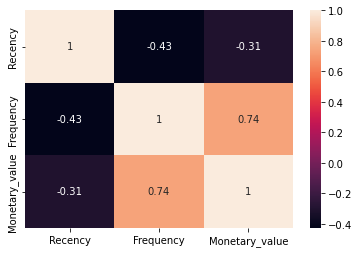

In [59]:
sns.heatmap(rfm.corr(),annot=True)

Recency          -0.030188
Frequency        -0.006574
Monetary_value   -0.030472
dtype: float64

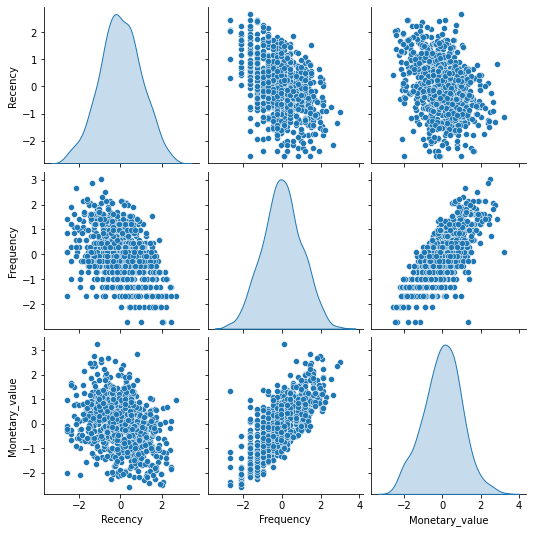

In [60]:
sns.pairplot(rfm,diag_kind='kde')
rfm.skew()

we can see that 
- skew was near to nomal 
- Correlation improved

data is ready to do **Clustering**

In [61]:
from sklearn.cluster import KMeans
# first problem to adress is finding the optimum number of clusters
df=rfm.set_index('Customer_Name')
df

,Recency,Frequency,Monetary_value
Customer_Name,,,
Aaron Bergman,1.394858,-0.479444,-0.231988
Aaron Hawkins,0.843573,0.438043,0.766187
Aaron Smayling,0.777773,0.724497,-0.491289
Adam Bellavance,-0.488428,0.438043,-0.236500
Adam Hart,-1.465672,2.066081,0.689013
...,...,...,...
Vivian Mathis,-0.851043,0.856179,0.847629
William Brown,-1.760163,1.720265,1.244480
Xylona Price,-1.343557,0.724497,0.235947


 **first problem to adress is finding the optimum number of clusters**

In [62]:
wcss=[]
for i in range(2,10):
    km=KMeans(i)
    km.fit(df)
    wcss.append(km.inertia_)

[1364.3641252959528, 1081.4727052114376, 858.3359954102685, 734.8678559120982, 640.7191748571058, 583.5542627842708, 542.9043477494704, 504.6796315766534]


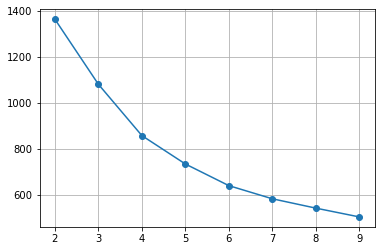

In [63]:
print(wcss)
plt.plot([i for i in range(2,10)],wcss,marker='o')
plt.grid()
plt.show()

In [64]:
from kneed.knee_locator import KneeLocator
k=KneeLocator(x=range(2,10),y=wcss,curve='convex',direction='decreasing')
k.elbow

5

In [65]:
from sklearn.metrics import silhouette_score,silhouette_samples
for i in range(2,10):
    print(i,silhouette_score(df,KMeans(random_state=10,n_clusters=i).fit_predict(df)))

2 0.3546902477609866
3 0.2776271578508488
4 0.2910247576858254
5 0.2698965140750911
6 0.2768325142498904
7 0.2691781076891931
8 0.24647072528451672
9 0.24999030617332982


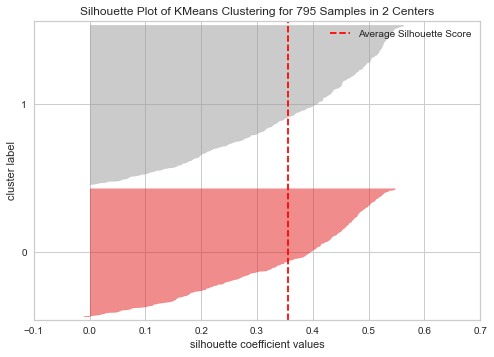

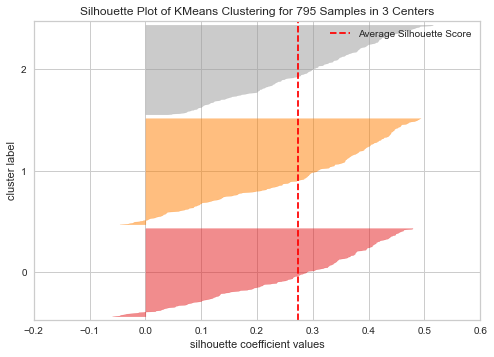

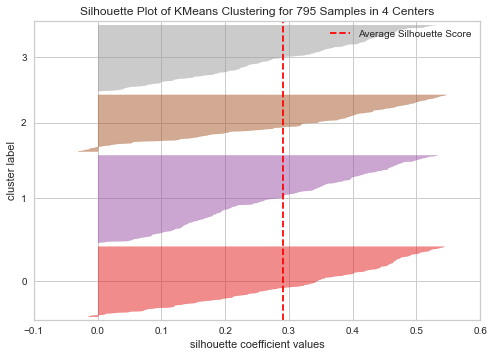

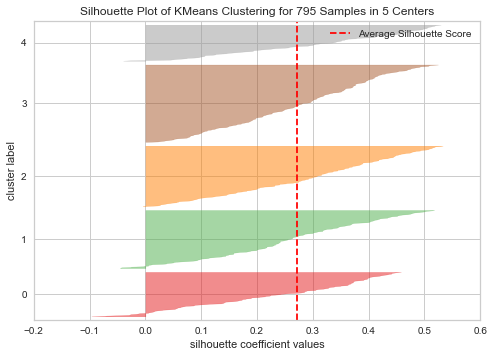

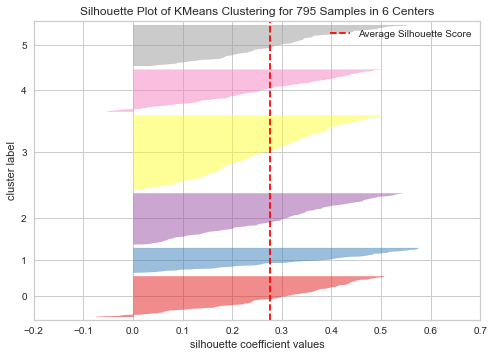

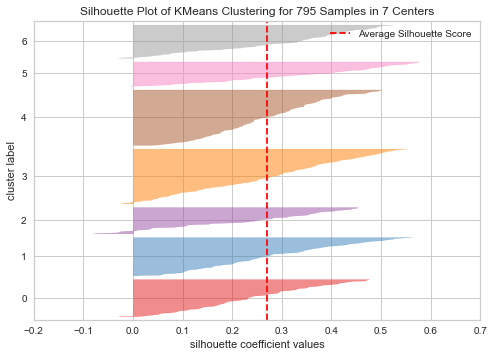

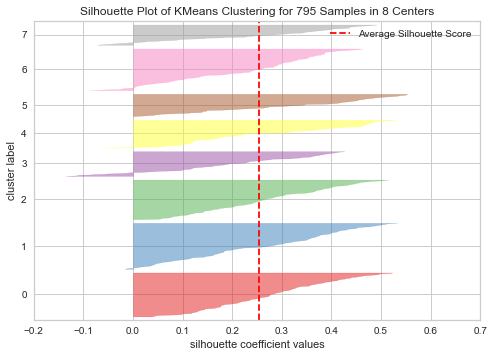

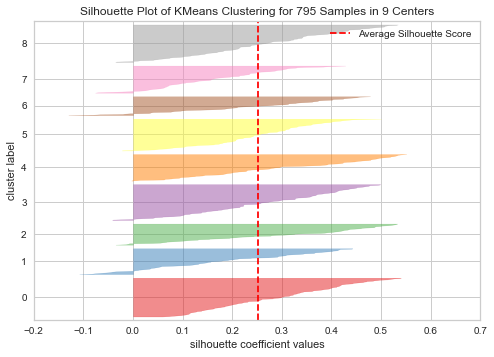

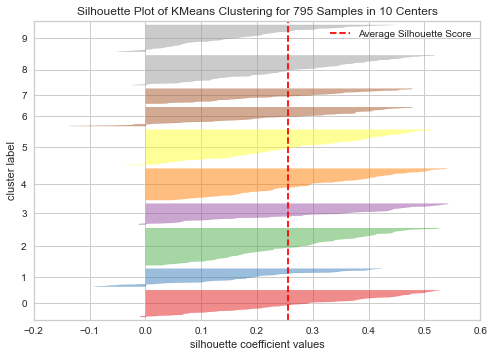

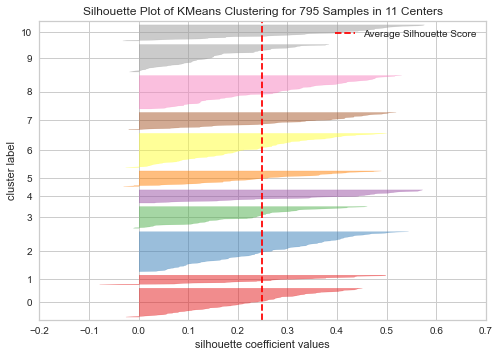

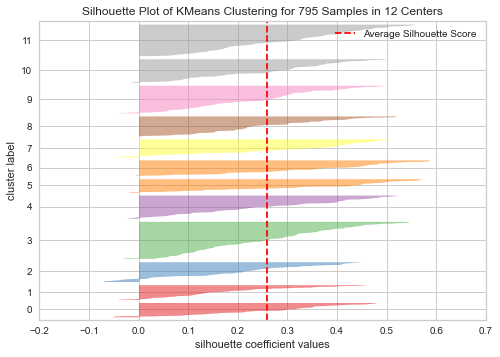

In [66]:
from yellowbrick.cluster import silhouette_visualizer
for i in range(2,13):
    silhouette_visualizer(KMeans(i),df)

In [67]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
link_mat=linkage(df,method='ward')
link_mat

array([[6.93000000e+02, 7.71000000e+02, 1.52426910e-02, 2.00000000e+00],
       [5.00000000e+01, 7.60000000e+02, 1.61922849e-02, 2.00000000e+00],
       [1.40000000e+01, 4.07000000e+02, 1.99876876e-02, 2.00000000e+00],
       ...,
       [1.58400000e+03, 1.58500000e+03, 2.36428509e+01, 5.41000000e+02],
       [1.58100000e+03, 1.58600000e+03, 3.01488085e+01, 6.72000000e+02],
       [1.58000000e+03, 1.58700000e+03, 3.76507228e+01, 7.95000000e+02]])

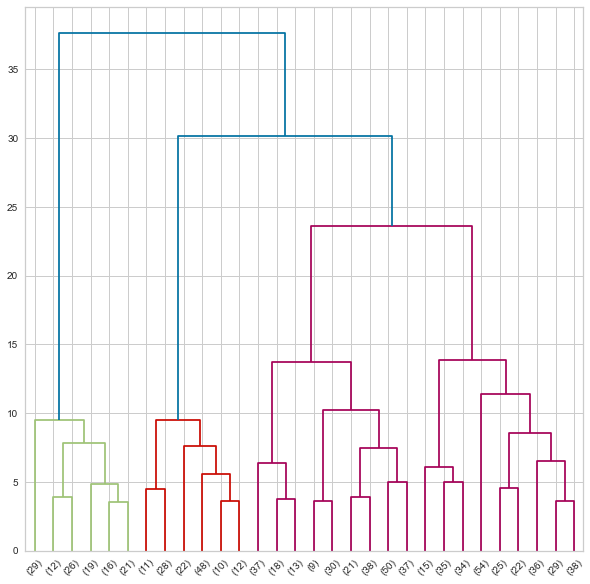

In [68]:
plt.figure(figsize=(10,10))
# d=dendrogram(link_mat)
d=dendrogram(link_mat,truncate_mode='lastp')

In [69]:
from sklearn.cluster import DBSCAN
db=DBSCAN()
db.fit(df)
# sns.scatterplot(df.iloc[:,1],df.iloc[:,2],hue=db.labels_,palette='tab10')

DBSCAN()

So After trying to find the optimum Number of clusters by variour methods
- Elbow Plot - **4** Clusters
- Silhhouette Score - **4** Clusters
- Silhouette Visualizer - **4** Clusters
- Dendrogram- - **4** Clusters

So we finalise the optimum number of Clusters as 4 Clusters

In [70]:
km=KMeans(4,random_state=10)
km.fit(df)
rfm['Segment']=km.labels_
rfm_segmentation['Customer_Segment']=km.labels_

**Checking if Clustering becomes more appropriate using PCA**

In [71]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(df)

array([[ 1.09120962, -1.01907351, -0.00802966],
       [-0.36358086, -1.16392683,  0.06018892],
       [ 0.19132281, -0.62303285, -0.97283983],
       ...,
       [-1.2278625 ,  0.92017864, -0.17702183],
       [ 1.32982473,  0.96632103, -0.46892283],
       [-0.04847838,  0.71541536, -0.07265284]])

In [72]:
pca.explained_variance_ratio_.cumsum()
# taking 2 components which accounts to 91% variations of data

array([0.6680043 , 0.91650359, 1.        ])

In [73]:
pca=PCA(2)
pdf=pca.fit_transform(df)
pdf

array([[ 1.09120962, -1.01907351],
       [-0.36358086, -1.16392683],
       [ 0.19132281, -0.62303285],
       ...,
       [-1.2278625 ,  0.92017864],
       [ 1.32982473,  0.96632103],
       [-0.04847838,  0.71541536]])

In [74]:
pwcss=[]
for i in range(2,10):
    km=KMeans(i)
    km.fit(pdf)
    pwcss.append(km.inertia_)

[1364.3641252959528, 1081.4727052114376, 858.3359954102685, 734.8678559120982, 640.7191748571058, 583.5542627842708, 542.9043477494704, 504.6796315766534]


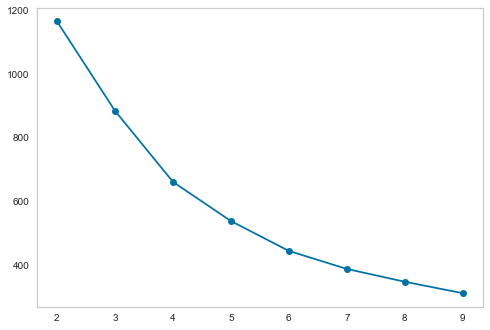

In [75]:
print(wcss)
plt.plot([i for i in range(2,10)],pwcss,marker='o')
plt.grid()
plt.show()

In [76]:
from kneed.knee_locator import KneeLocator
k=KneeLocator(x=range(2,10),y=pwcss,curve='convex',direction='decreasing')
k.elbow

5

In [77]:
from sklearn.metrics import silhouette_score,silhouette_samples
for i in range(2,10):
    print(i,silhouette_score(df,KMeans(random_state=10,n_clusters=i).fit_predict(pdf)))

2 0.3546902477609866
3 0.28261808850219267
4 0.29430795425337763
5 0.26956802300496174
6 0.2763330490979328
7 0.26873953400175304
8 0.25322137257833865
9 0.24977230485040455


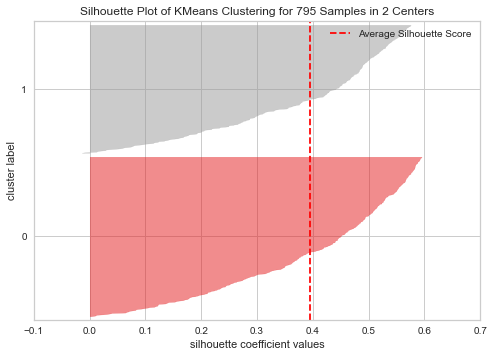

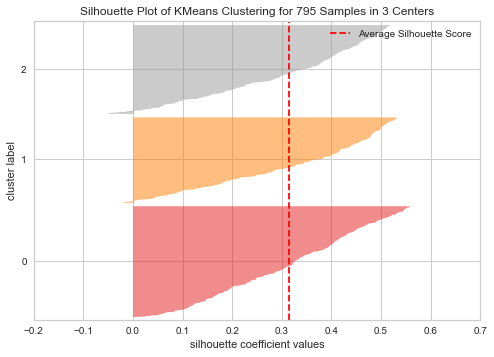

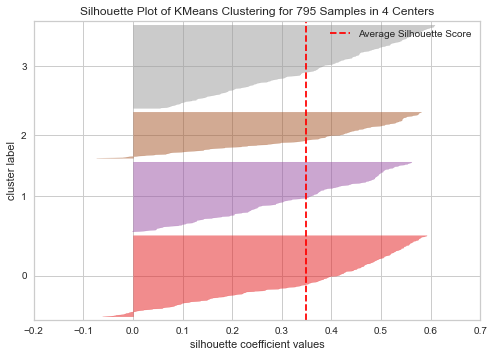

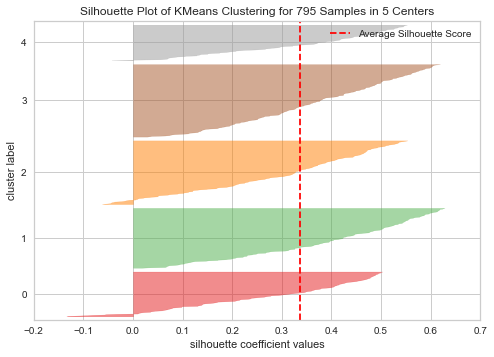

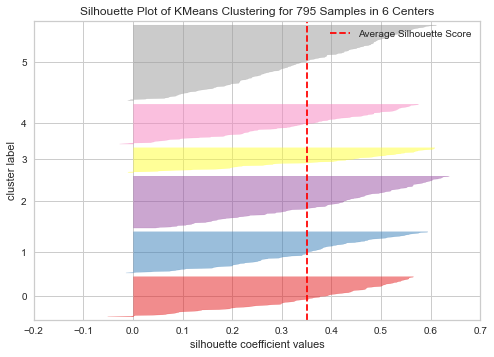

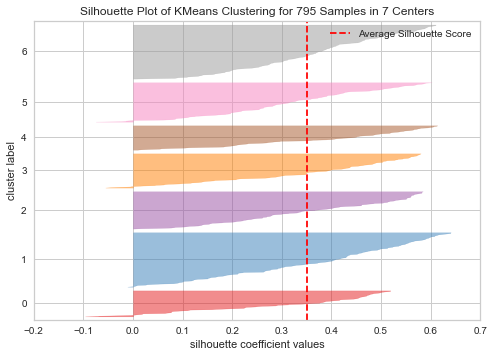

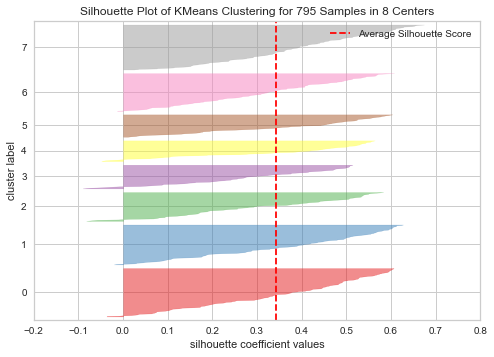

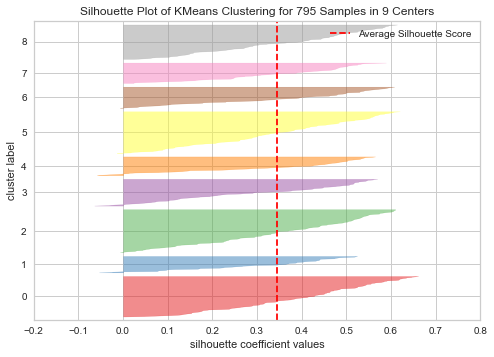

In [78]:
from yellowbrick.cluster import silhouette_visualizer
for i in range(2,10):
    silhouette_visualizer(KMeans(i),pdf)

In [79]:
plink_mat=linkage(pdf,method='ward')
plink_mat

array([[7.13000000e+02, 7.47000000e+02, 1.93829377e-03, 2.00000000e+00],
       [3.82000000e+02, 6.46000000e+02, 4.54043866e-03, 2.00000000e+00],
       [3.13000000e+02, 5.43000000e+02, 5.16986876e-03, 2.00000000e+00],
       ...,
       [1.58200000e+03, 1.58400000e+03, 1.89015430e+01, 3.00000000e+02],
       [1.58300000e+03, 1.58500000e+03, 2.49729495e+01, 4.95000000e+02],
       [1.58600000e+03, 1.58700000e+03, 4.36953712e+01, 7.95000000e+02]])

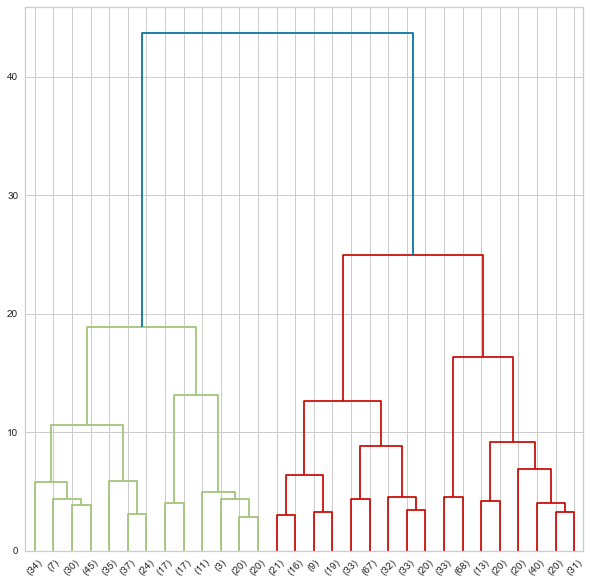

In [80]:
plt.figure(figsize=(10,10))
# d=dendrogram(link_mat)
d=dendrogram(plink_mat,truncate_mode='lastp')

So After trying to find the optimum clusters for PCA Data by variour methods
- Elbow Plot - **5** Clusters
- Silhhouette Score - **4** Clusters
- Silhouette Visualizer - **4** Clusters
- Dendrogram- - **2** Clusters

and we finalise the optimum number of Clusters as 4 Clusters

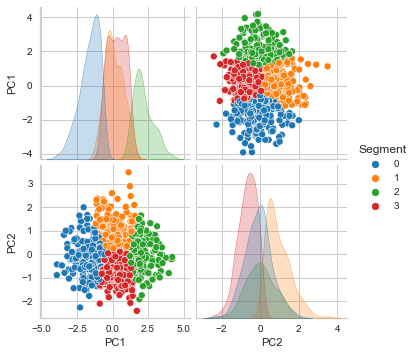

In [81]:
from sklearn.cluster import kmeans_plusplus
pkm=KMeans(4,random_state=10,init='k-means++')
pdf=pd.DataFrame(pdf,columns=['PC1','PC2'])
pkm.fit(pdf)
pdf['Segment']=pkm.labels_
rfm_segmentation['PCA_clusters']=pkm.labels_
sns.pairplot(pdf,hue='Segment',palette='tab10')

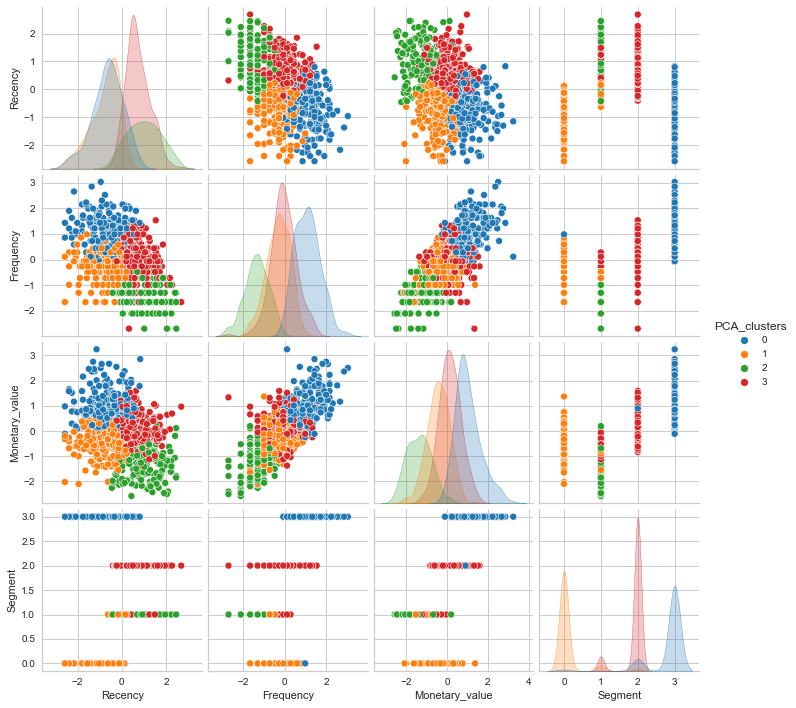

In [82]:
rfm['PCA_clusters']=pkm.labels_
sns.pairplot(rfm,hue='PCA_clusters',palette='tab10')

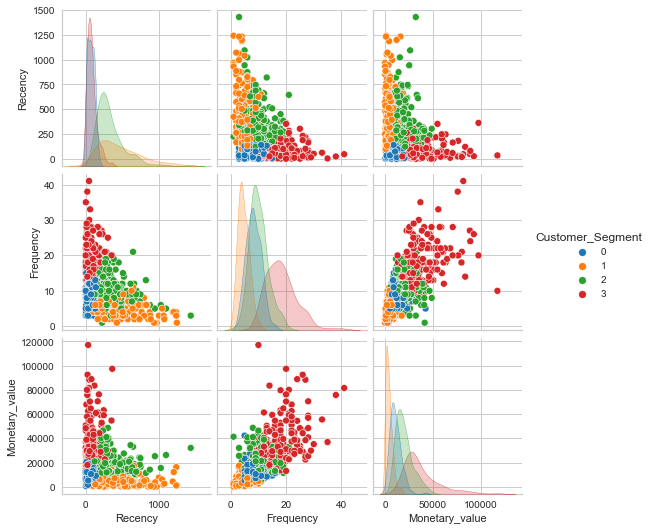

In [83]:
sns.pairplot(rfm_segmentation[['Recency','Frequency','Monetary_value','Customer_Segment']],hue='Customer_Segment',palette='tab10')

As we have Compared both the Pca and normal data i think that 
- we need to go with normal data 
    - there is no significant improvement in clustering
    -on the other hand we are loosing 10% Data
- So we finalize clusters produced by normal data using KMeans as our Final Customer_Segments

In [84]:
smdf=pd.concat([rfm_segmentation[['Recency','Frequency','Monetary_value','Customer_Segment']][rfm_segmentation[['Recency','Frequency','Monetary_value','Customer_Segment']].Customer_Segment==0].describe(),rfm_segmentation[['Recency','Frequency','Monetary_value','Customer_Segment']][rfm_segmentation[['Recency','Frequency','Monetary_value','Customer_Segment']].Customer_Segment==1].describe(),rfm_segmentation[['Recency','Frequency','Monetary_value','Customer_Segment']][rfm_segmentation[['Recency','Frequency','Monetary_value','Customer_Segment']].Customer_Segment==2].describe(),rfm_segmentation[['Recency','Frequency','Monetary_value','Customer_Segment']][rfm_segmentation[['Recency','Frequency','Monetary_value','Customer_Segment']].Customer_Segment==3].describe()])

In [85]:
Segment_Metrics_df=smdf.set_index([pd.Series(['Segment - '+str(j)  for j in range(4) for i in range(8)]),smdf.index])

Descriptive Statistics of each Segment and Attribute

In [86]:
#The Below Table Shows the statistical data such as mean, mode, median, min, max of segments and attributes
Segment_Metrics_df.stack(0).unstack(0)

Segment - 0   Segment - 1   Segment - 2  \
25%   Recency              30.500000    245.000000    202.000000   
      Frequency             6.000000      3.000000      8.000000   
      Monetary_value     6928.803250   1310.385000  13199.296500   
      Customer_Segment      0.000000      1.000000      2.000000   
50%   Recency              66.000000    389.000000    278.000000   
      Frequency             8.000000      4.000000     10.000000   
      Monetary_value     9564.480000   3226.979500  18217.810000   
      Customer_Segment      0.000000      1.000000      2.000000   
75%   Recency             108.500000    625.000000    398.500000   
      Frequency            10.000000      6.000000     12.000000   
      Monetary_value    13918.707500   5709.484500  24327.146500   
      Customer_Segment      0.000000      1.000000      2.000000   
count Recency             187.000000    161.000000    248.000000   
      Frequency           187.000000    161.000000    248.000000   
      Monetary_value      187.000000    161.000000    248.000000   
      Customer_Segment    187.000000    161.000000    248.000000   
max   Recency             186.000000   1242.000000   1430.000000   
      Frequency            16.000000     11.000000     21.000000   
      Monetary_value    42255.168000  17409.380000  48660.873000   
      Customer_Segment      0.000000      1.000000      2.000000   
mean  Recency              71.775401    457.795031    329.387097   
      Frequency             8.224599      4.614907     10.068548   
      Monetary_value    10826.110853   4036.294391  19848.115532   
      Customer_Segment      0.000000      1.000000      2.000000   
min   Recency               0.000000     74.000000     99.000000   
      Frequency             3.000000      1.000000      1.000000   
      Monetary_value      555.820000     85.720000   5860.374500   
      Customer_Segment      0.000000      1.000000      2.000000   
std   Recency              46.532482    279.373610    189.523853   
      Frequency             2.690652      2.015757      3.400306   
      Monetary_value     5910.341442   3414.566903   8780.646512   
      Customer_Segment      0.000000      0.000000      0.000000   

                          Segment - 3  
25%   Recency               33.000000  
      Frequency             14.000000  
      Monetary_value     24796.900000  
      Customer_Segment       3.000000  
50%   Recency               67.000000  
      Frequency             18.000000  
      Monetary_value     30557.781500  
      Customer_Segment       3.000000  
75%   Recency              107.000000  
      Frequency             21.000000  
      Monetary_value     44332.596500  
      Customer_Segment       3.000000  
count Recency              199.000000  
      Frequency            199.000000  
      Monetary_value       199.000000  
      Customer_Segment     199.000000  
max   Recency              362.000000  
      Frequency             41.000000  
      Monetary_value    117124.438000  
      Customer_Segment       3.000000  
mean  Recency               81.984925  
      Frequency             18.195980  
      Monetary_value     36778.603244  
      Customer_Segment       3.000000  
min   Recency                0.000000  
      Frequency              9.000000  
      Monetary_value     13080.812000  
      Customer_Segment       3.000000  
std   Recency               67.312364  
      Frequency              5.490744  
      Monetary_value     17924.377501  
      Customer_Segment       0.000000

visualizing spread/Distrubution of segments

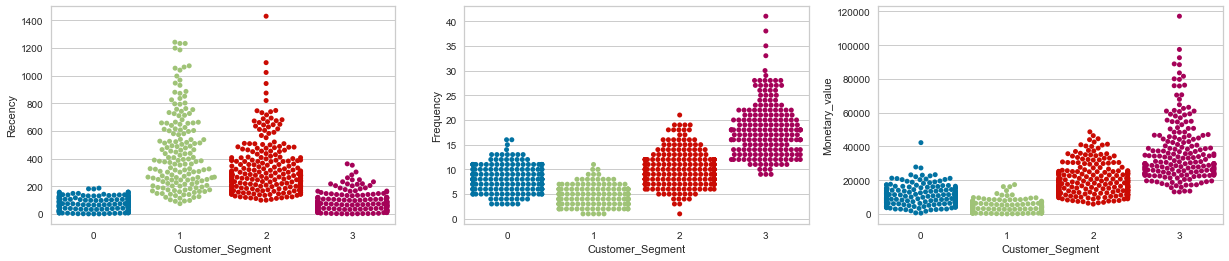

In [87]:
fig,ax=plt.subplots(1,3,figsize=(21,4))
for i,j in zip(rfm_segmentation.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.swarmplot(rfm_segmentation.Customer_Segment,rfm_segmentation[i],ax=j)

Customer Characteristics and Cluster Properties

In [88]:
rfm_segmentation.groupby('Customer_Segment')[['R_Quartile', 'F_Quartile', 'M_Quartile']].apply(lambda x: x.mode().iloc[0])

,R_Quartile,F_Quartile,M_Quartile
Customer_Segment,,,
0,4,2,2
1,1,1,1
2,2,3,3
3,4,4,4


**Customer_Segmant - 0  RFMScore - 422**

by looking at the RFM score of the cluster 0 Customers, we can say that 
- Those are **187--NEW Customers** who are moderately active
- Who made recent Purchases with moderate spending levels
- They are potential ones to be converted into loyal/best customers
- We need to do focus on them by doing:
  - Customer retention practices on them 
  - Upselling
  - target marketing
  - loyality Programs
  - making them satisfied by good service and asking feedback


**Customer_Segmant - 1  RFMScore - 111**

by looking at the RFM score of the cluster 1 Customers, we can say that 
- Those are **161--LOST Customers** who are NOT at all active
- Who didn't made any recent Purchases with very less spending levels
- They have Previously Engaged with business and gradually disengaged and stopped
- We need to do focus on them by doing:
  - Customer Reactivation 
  - Special Offers
  - Personalised Communication

**Customer_Segmant - 2  RFMScore - 233**

by looking at the RFM score of the cluster 2 Customers, we can say that 
- Those are **248--LOYAL Customers** who are active
- Who didnt made very recent Purchases with good spending levels  but at brink of **Risk**
- They are best customers but can possibly be disengaged soon
- We need to do focus on them by doing:
  - Customer Re-engagement 
  - Personalized offers
  - Regular Communication
  - Excellent Customer Service

**Customer_Segmant - 3  RFMScore - 444**

by looking at the RFM score of the cluster 3 Customers, we can say that 
- Those are **199--BEST Customers** who are very active
- Who made  recent Purchases with very good spending levels 
- They are best customers but can possibly be disengaged soon
- We need to do focus on them by doing:
  - Exclusive Benfits 
  - Personalized and Surprise offers
  - Excellent Customer Service
  - Loyality Program